In [1]:
import numpy as np
import time
import MDAnalysis as mda
from MDAnalysis.tests.datafiles import XTC, GRO
import MDAnalysis.analysis.rms
from MDAnalysis.analysis.rms import rmsd
from MDAnalysis.analysis import align

/Users/owner/opt/anaconda3/lib/python3.9/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [3]:
C_wt = np.loadtxt('/Volumes/3KSPAT/from_2KSPAT/metad_convergence/wt/free_ener_wt/8us/Boltzmann_wighted_WT_corr.txt')
C_e203k = np.loadtxt('/Volumes/3KSPAT/from_2KSPAT/metad_convergence/e203k/e203_metadyn_2/analysis/Boltzmann_wighted_e203k_corr.txt')
C_ssdd = np.loadtxt('/Volumes/3KSPAT/from_2KSPAT/metad_convergence/ssdd/ssdd_metadyn_2/analysis/Boltzmann_wighted_ssdd_corr.txt')
C_e203k_ssdd = np.loadtxt('/Volumes/3KSPAT/chestnut/ceph/rradhakrishnan/metadynamics_ssdd_e203k_2/analysis/Boltzmann_wighted_e203k_ssdd_corr.txt')
C_f53s = np.loadtxt('/Volumes/3KSPAT/from_2KSPAT/metad_convergence/f53s/f53s_matadyn_2/analysis/traj_f53s/Boltzmann_weighted_f53s_corr.txt')
C_dp = np.loadtxt('/Users/owner/Desktop/diphos/Boltzmann_wighted_diphos_corr.txt')

In [4]:
f = [ C_wt, C_e203k, C_ssdd, C_e203k_ssdd, C_f53s, C_dp]
h = [ C_wt, C_e203k, C_ssdd, C_e203k_ssdd, C_f53s, C_dp]
d_mat = np.zeros((len(f),len(f)))


for i in range(0,len(f)):
    for j in range(0,len(f)):
        d_mat[i][j] = np.sum((f[i] - h[j])**2)
        
        

In [5]:
d_mat = d_mat/1000
d_mat

array([[ 0.        , 39.1731333 , 33.53917183, 45.54969241, 43.09318995,
        49.25694284],
       [39.1731333 ,  0.        , 12.01933046, 13.36048253, 12.27947969,
        12.04902303],
       [33.53917183, 12.01933046,  0.        , 20.45648562, 17.13911864,
        16.11400039],
       [45.54969241, 13.36048253, 20.45648562,  0.        , 15.57116787,
        12.79626503],
       [43.09318995, 12.27947969, 17.13911864, 15.57116787,  0.        ,
        18.07599578],
       [49.25694284, 12.04902303, 16.11400039, 12.79626503, 18.07599578,
         0.        ]])

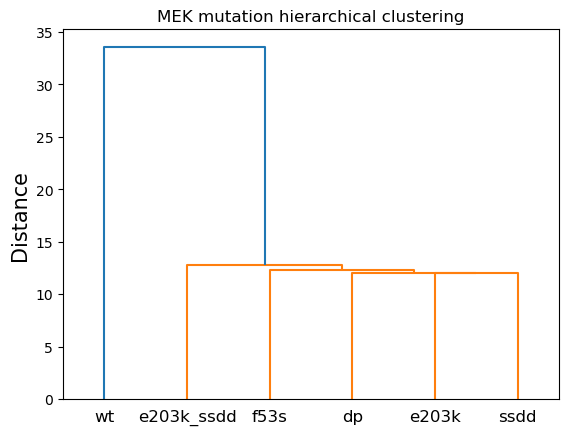

In [6]:
import numpy as np

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

import matplotlib.pyplot as plt


mat = d_mat
dists = squareform(mat)
linkage_matrix = linkage(dists, "single")
dendrogram(linkage_matrix, labels=["wt", "e203k", "ssdd", "e203k_ssdd", "f53s", "dp"],leaf_font_size=14)
plt.title("MEK mutation hierarchical clustering")
plt.ylabel("Distance", fontsize=15)
plt.yticks(fontsize=10)
plt.xticks(fontsize=12)

plt.savefig('MEK_cluster.png', bbox_inches = 'tight', dpi = 300)
plt.show()